In [6]:
import pandas as pd

#!pip install openpyxl


# Veri setini yükleme
df = pd.read_excel('scaled_data.xlsx')

# İlgili kolonları seçme
selected_columns = ['TYPE', 'BYTES', 'BYTES_REV', 'PACKETS', 'PACKETS_REV', 'DBI_BRST_BYTES_MEAN', 'DBI_BRST_PACKETS_MEAN', 'PKT_LENGTHS_MEAN', 'BRST_DURATION_MEAN', 'INTERVALS_MEAN']
new_df = df[selected_columns]

# Yeni DataFrame'i Excel dosyası olarak kaydetme
new_df.to_excel('clean_data.xlsx', index=False)

print("Yeni Excel dosyası başarıyla kaydedildi.")



Yeni Excel dosyası başarıyla kaydedildi.


In [7]:
import pandas as pd

# Veri setini yükle
df = pd.read_excel('clean_data.xlsx')

# 'TYPE' sütunundaki değerleri 1 azalt
df['TYPE'] = df['TYPE'] - 1

# Değişiklikleri kontrol etmek için ilk beş satırı göster
print(df.head())

# Değişiklikleri kaydet
df.to_excel('cleaned_data.xlsx', index=False)


   TYPE     BYTES  BYTES_REV   PACKETS  PACKETS_REV  DBI_BRST_BYTES_MEAN  \
0     0 -0.141212  -0.121107 -0.224788    -0.088774             0.067595   
1     0 -0.124012   0.164157  0.032401     0.274727             0.465938   
2     0 -0.135956   0.216585 -0.158755     0.283816            -0.033907   
3     0 -0.139155  -0.068485 -0.204486    -0.053880            -0.101746   
4     0 -0.099936   0.994396  0.484314     1.212188            -0.104139   

   DBI_BRST_PACKETS_MEAN  PKT_LENGTHS_MEAN  BRST_DURATION_MEAN  INTERVALS_MEAN  
0               0.095148          0.886264            0.085487       -0.256834  
1               0.520218          0.978792            0.786719       -0.256834  
2              -0.038132          1.258193           -0.138908       -0.256834  
3              -0.105143          1.102164           -0.166957       -0.256834  
4              -0.107616          1.209207           -0.166957       -0.256834  


In [5]:
import pandas as pd
# from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Veri setini yükleme
df = pd.read_excel('cleaned_data.xlsx')

# Kümeleme için özelliklerin seçilmesi
features = df.drop('TYPE', axis=1)

# # Özelliklerin normalleştirilmesi
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)

# K-Means ile kümeleme
kmeans = KMeans(n_clusters=6, random_state=0)  # Burada, 6 farklı kategori olduğu varsayılmıştır
clusters = kmeans.fit_predict(features)

# Küme etiketlerini DataFrame'e ekleyelim
df['Cluster'] = clusters

# İlk beş satırı gösterme
print(df.head())


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   TYPE     BYTES  BYTES_REV   PACKETS  PACKETS_REV  DBI_BRST_BYTES_MEAN  \
0     0 -0.141212  -0.121107 -0.224788    -0.088774             0.067595   
1     0 -0.124012   0.164157  0.032401     0.274727             0.465938   
2     0 -0.135956   0.216585 -0.158755     0.283816            -0.033907   
3     0 -0.139155  -0.068485 -0.204486    -0.053880            -0.101746   
4     0 -0.099936   0.994396  0.484314     1.212188            -0.104139   

   DBI_BRST_PACKETS_MEAN  PKT_LENGTHS_MEAN  BRST_DURATION_MEAN  \
0               0.095148          0.886264            0.085487   
1               0.520218          0.978792            0.786719   
2              -0.038132          1.258193           -0.138908   
3              -0.105143          1.102164           -0.166957   
4              -0.107616          1.209207           -0.166957   

   INTERVALS_MEAN  Cluster  
0       -0.256834        0  
1       -0.256834        0  
2       -0.256834        0  
3       -0.256834        0  
4

In [6]:

# Değişiklikleri kaydet
df.to_excel('clustered_data.xlsx', index=False)


In [7]:
import pandas as pd

# Veri setini yükleme
df = pd.read_excel('clustered_data.xlsx')

# Kümelerin TYPE dağılımını analiz etme
cluster_type_distribution = df.groupby(['Cluster', 'TYPE']).size().unstack(fill_value=0)

# Dağılımı yazdırma
print(cluster_type_distribution)


TYPE        0      1     2     3      4      5
Cluster                                       
0        8375  12238  9451  8393  17347    241
1           0      0     1     0    297      0
2           1     12    38    97     54   4471
3         464    264  1182    84   1842  76077
4           3      0     0  2285     46      0
5        1530     39    29     3    807      0


              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2032
           1       0.95      0.97      0.96      2466
           2       0.93      0.87      0.89      2171
           3       1.00      1.00      1.00      2168
           4       0.90      0.95      0.92      4084
           5       1.00      1.00      1.00     16214

    accuracy                           0.97     29135
   macro avg       0.96      0.95      0.95     29135
weighted avg       0.97      0.97      0.97     29135



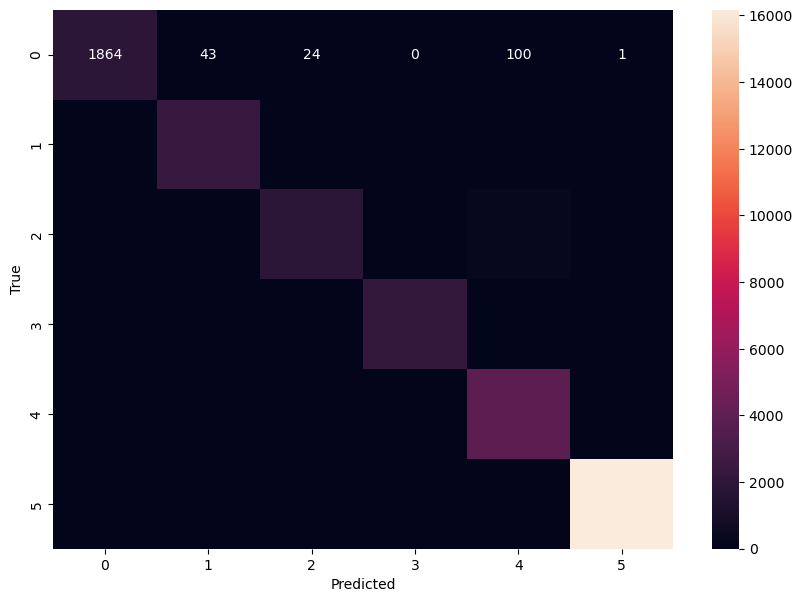

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükleyin
df = pd.read_excel('cleaned_data.xlsx')

# Bağımsız değişkenler ve bağımlı değişken
X = df.drop('TYPE', axis=1)
y = df['TYPE']

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini kurma ve eğitme
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Sınıflandırma raporu ve karmaşıklık matrisi
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


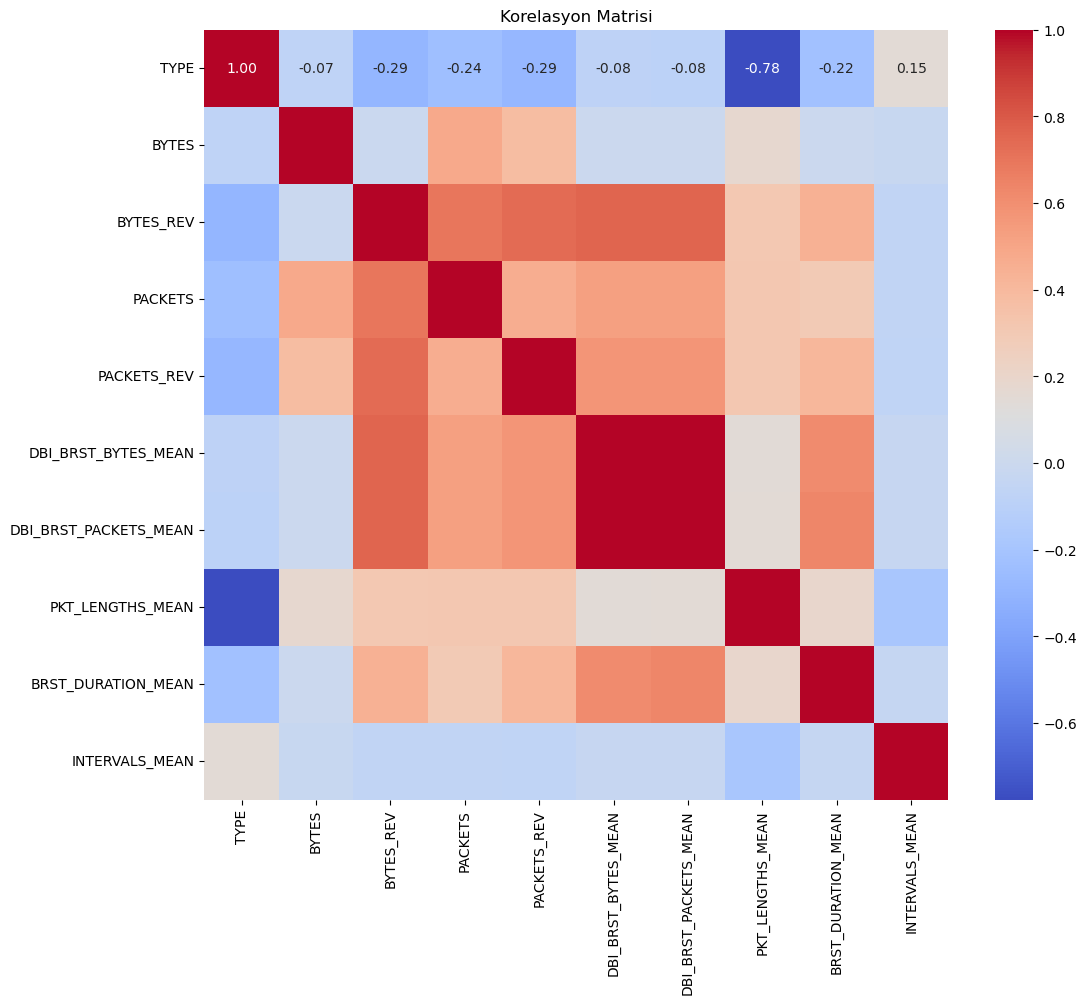

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleyin
df = pd.read_excel('cleaned_data.xlsx')

# Korelasyon matrisini hesaplama
corr_matrix = df.corr()

# Korelasyon matrisini ısı haritası olarak görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()


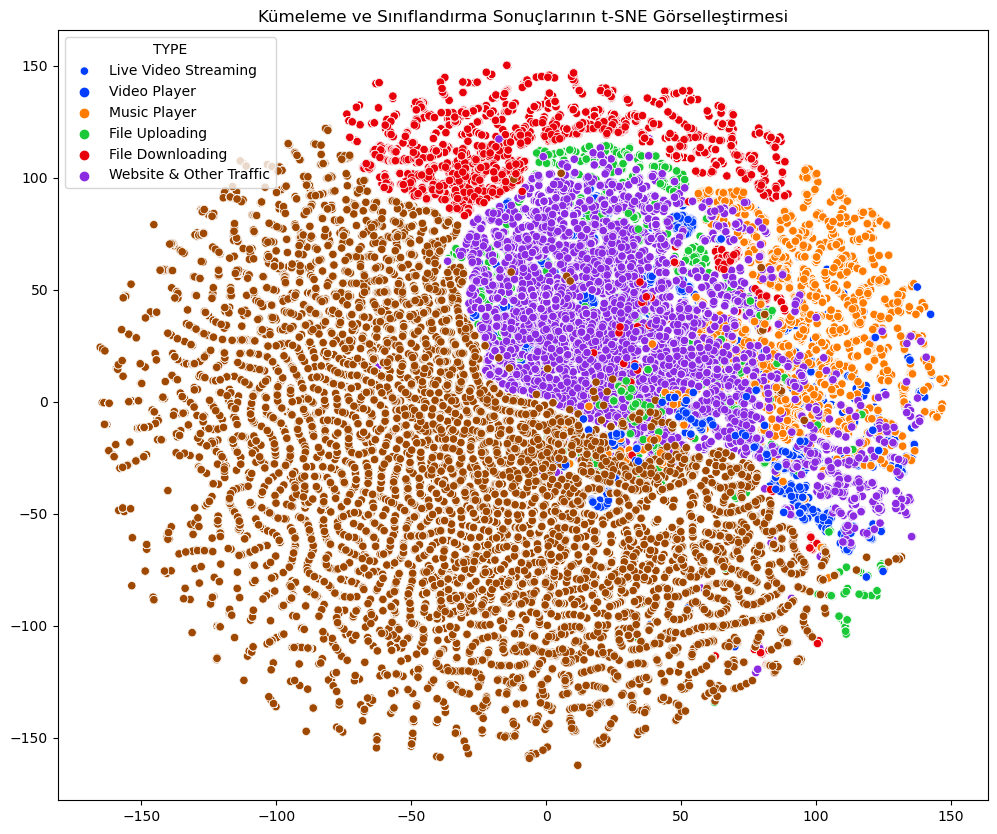

In [2]:
from sklearn.manifold import TSNE

# Boyut indirgeme
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(df.drop('TYPE', axis=1))

# Görselleştirme
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df['TYPE'], palette='bright')
plt.title('Kümeleme ve Sınıflandırma Sonuçlarının t-SNE Görselleştirmesi')
plt.legend(title='TYPE', labels=['Live Video Streaming', 'Video Player', 'Music Player', 'File Uploading', 'File Downloading', 'Website & Other Traffic'])
plt.show()


In [3]:
import pandas as pd

# Veri setini yükleme
df = pd.read_excel('cleaned_data.xlsx')

# Aykırı değerleri tespit etmek için IQR hesaplama
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin filtrelenmesi
is_outlier = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_outliers = df[is_outlier]
df_clean = df[~is_outlier]

print(f"Original Data: {df.shape}")
print(f"Data with Outliers: {df_outliers.shape}")
print(f"Cleaned Data: {df_clean.shape}")


Original Data: (145671, 10)
Data with Outliers: (64649, 10)
Cleaned Data: (81022, 10)


In [4]:
# Temizlenmiş veri setini Excel dosyası olarak kaydetme
df_clean.to_excel('cleaned_data_no_outliers.xlsx', index=False)


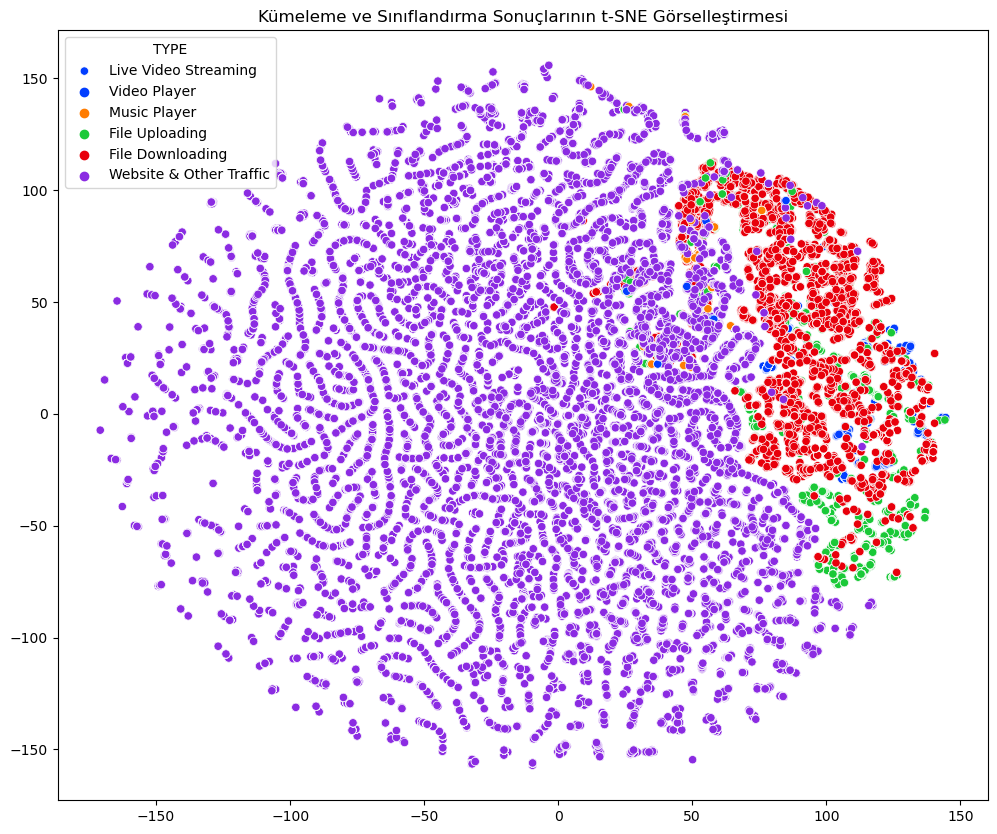

In [5]:
from sklearn.manifold import TSNE

df = pd.read_excel('cleaned_data_no_outliers.xlsx')

# Boyut indirgeme
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(df.drop('TYPE', axis=1))

# Görselleştirme
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df['TYPE'], palette='bright')
plt.title('Kümeleme ve Sınıflandırma Sonuçlarının t-SNE Görselleştirmesi')
plt.legend(title='TYPE', labels=['Live Video Streaming', 'Video Player', 'Music Player', 'File Uploading', 'File Downloading', 'Website & Other Traffic'])
plt.show()

In [6]:
import pandas as pd
from scipy.stats import zscore

# Veri setini yükleme
df = pd.read_excel('cleaned_data.xlsx')

# Z-Skorlarını hesaplama
z_scores = df.apply(zscore)

# Aykırı değerlerin belirlenmesi (|z| > 3)
outliers = (z_scores.abs() > 3).any(axis=1)
df_outliers_z = df[outliers]
df_clean_z = df[~outliers]

print(f"Original Data: {df.shape}")
print(f"Data with Outliers (Z-Score): {df_outliers_z.shape}")
print(f"Cleaned Data (Z-Score): {df_clean_z.shape}")


Original Data: (145671, 10)
Data with Outliers (Z-Score): (9131, 10)
Cleaned Data (Z-Score): (136540, 10)


In [9]:
# Temizlenmiş veri setini Excel dosyası olarak kaydetme
df_clean_z.to_excel('cleaned_data_zscore.xlsx', index=False)


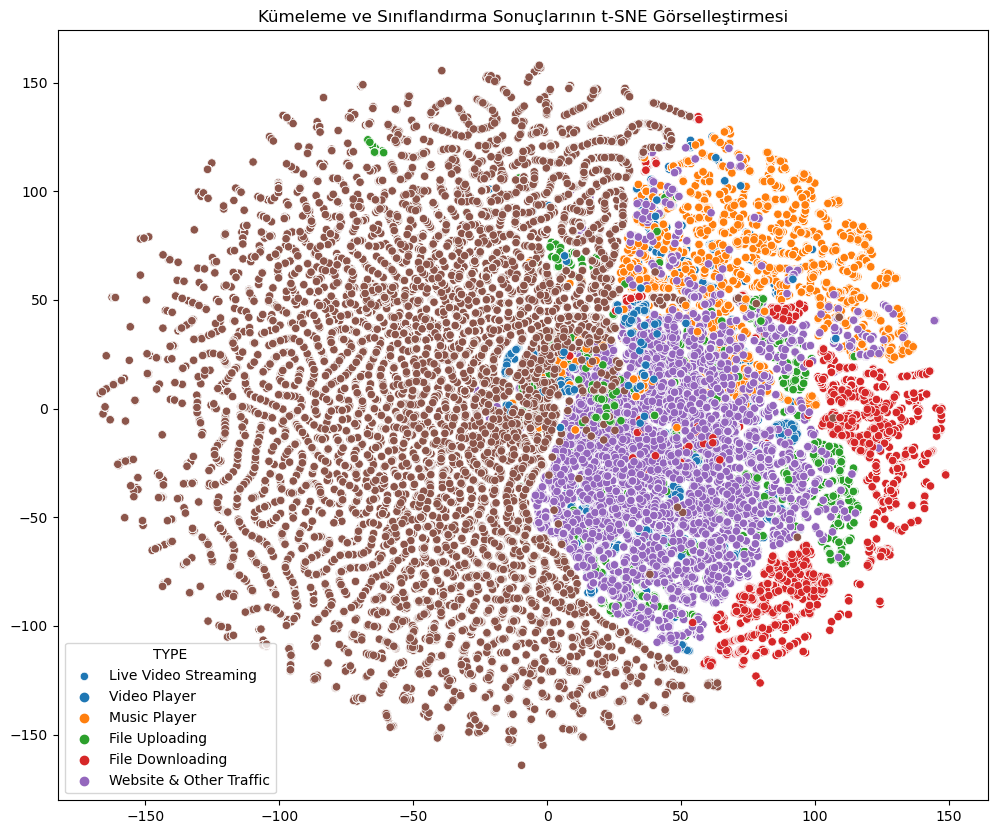

In [10]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleme
df = pd.read_excel('cleaned_data_zscore.xlsx')

# Boyut indirgeme
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(df.drop('TYPE', axis=1))

# Görselleştirme
plt.figure(figsize=(12, 10))
# 'tab10' paleti, 10 farklı rengi içerir ve her bir sınıf için net renkler sağlar
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df['TYPE'], palette='tab10')
plt.title('Kümeleme ve Sınıflandırma Sonuçlarının t-SNE Görselleştirmesi')
plt.legend(title='TYPE', labels=['Live Video Streaming', 'Video Player', 'Music Player', 'File Uploading', 'File Downloading', 'Website & Other Traffic'])
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [13]:
# Veri setlerini yükleme
df_original = pd.read_excel('cleaned_data.xlsx')
df_zscore = pd.read_excel('cleaned_data_zscore.xlsx')
df_iqr = pd.read_excel('cleaned_data_iqr.xlsx')

# Veri setlerini eğitim ve test setlerine ayırma fonksiyonu
def prepare_data(df):
    X = df.drop('TYPE', axis=1)
    y = df['TYPE']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test


In [14]:
# Model eğitimi ve değerlendirme fonksiyonu
def evaluate_model(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1_score

# Veri setlerini hazırlama
X_train_orig, X_test_orig, y_train_orig, y_test_orig = prepare_data(df_original)
X_train_zscore, X_test_zscore, y_train_zscore, y_test_zscore = prepare_data(df_zscore)
X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr = prepare_data(df_iqr)

# Modelleri eğitme ve performansları değerlendirme
accuracy_orig, precision_orig, recall_orig, f1_orig = evaluate_model(X_train_orig, X_test_orig, y_train_orig, y_test_orig)
accuracy_zscore, precision_zscore, recall_zscore, f1_zscore = evaluate_model(X_train_zscore, X_test_zscore, y_train_zscore, y_test_zscore)
accuracy_iqr, precision_iqr, recall_iqr, f1_iqr = evaluate_model(X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr)

# Performans sonuçlarını yazdırma
print("Original Data - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_orig, precision_orig, recall_orig, f1_orig))
print("Z-Score Data - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_zscore, precision_zscore, recall_zscore, f1_zscore))
print("IQR Data - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}, F1 Score: {:.2f}".format(accuracy_iqr, precision_iqr, recall_iqr, f1_iqr))


Original Data - Accuracy: 0.97, Precision: 0.97, Recall: 0.97, F1 Score: 0.97
Z-Score Data - Accuracy: 0.97, Precision: 0.97, Recall: 0.97, F1 Score: 0.97
IQR Data - Accuracy: 0.99, Precision: 0.99, Recall: 0.99, F1 Score: 0.99


In [17]:
#!pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


ModuleNotFoundError: No module named 'xgboost'

In [18]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
